# Unveiling the Android App Market: Analyzing Google Play Store Data

### Importing the libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import plotly.express as px

### Loading the datasets

In [3]:
apps_data = pd.read_csv('apps.csv')
reviews_data = pd.read_csv('user_reviews.csv')

### Basic Information

In [20]:
apps_data

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [21]:
reviews_data

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [22]:
apps_data.info()

reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #

In [23]:
apps_data.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [24]:
reviews_data.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

### 1. Data Preparation

In [25]:
# Clean the apps dataset
apps_data_cleaned = apps_data.drop(columns=['Unnamed: 0'], errors='ignore')  # Drop unnecessary columns
apps_data_cleaned = apps_data_cleaned.dropna(subset=['Rating', 'Size'])  # Drop rows with missing Rating or Size

# Clean and convert Installs column to numeric
apps_data_cleaned['Installs'] = apps_data_cleaned['Installs'].str.replace('[+,]', '', regex=True).astype(float)

# Clean and convert Price column to numeric
apps_data_cleaned['Price'] = apps_data_cleaned['Price'].str.replace('$', '').astype(float)

# Standardize Size column
apps_data_cleaned['Size'] = apps_data_cleaned['Size'].replace('Varies with device', None)  # Replace "Varies with device"
apps_data_cleaned['Size'] = apps_data_cleaned['Size'].fillna('0')  # Replace NaN with '0' temporarily
apps_data_cleaned['Size'] = apps_data_cleaned['Size'].astype(str)  # Ensure all values are strings
apps_data_cleaned['Size'] = apps_data_cleaned['Size'].str.replace('M', '', regex=False)  # Remove 'M'
apps_data_cleaned['Size'] = apps_data_cleaned['Size'].str.replace('k', '', regex=False)  # Remove 'k'

# Convert 'Size' to numeric
apps_data_cleaned['Size'] = pd.to_numeric(apps_data_cleaned['Size'], errors='coerce')

# Convert KB to MB (if any entries were in KB)
apps_data_cleaned['Size'] = apps_data_cleaned['Size'].apply(lambda x: x / 1024 if x and x > 100 else x)

# Drop rows with Size = 0 or NaN
apps_data_cleaned = apps_data_cleaned[apps_data_cleaned['Size'] > 0]


### 2. Category Exploration

/tmp/ipykernel_7850/870592332.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




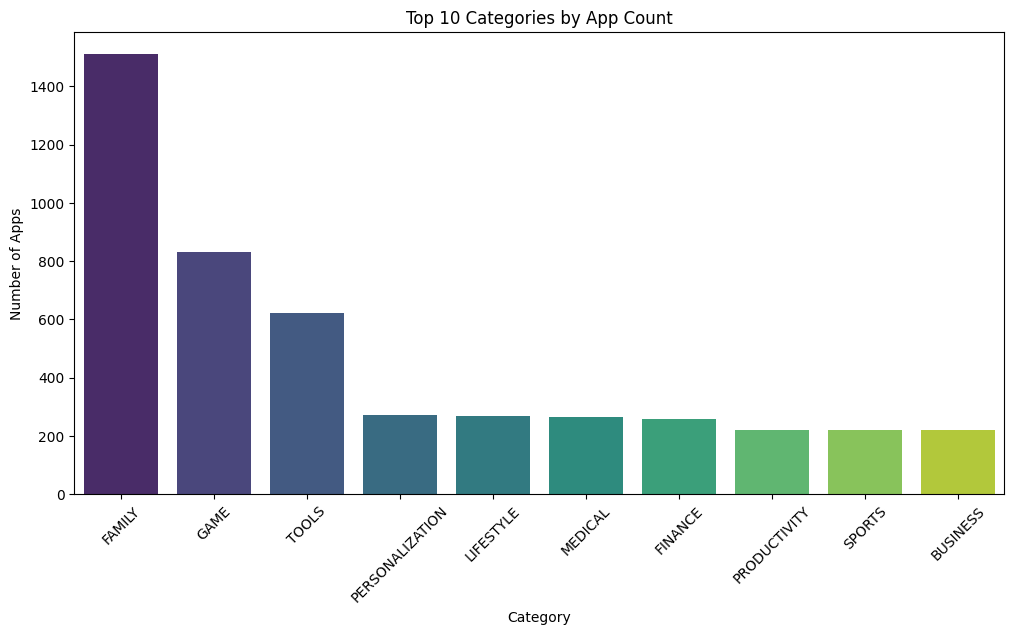

In [26]:
# App distribution across categories
category_counts = apps_data_cleaned['Category'].value_counts()

# Visualization: Top 10 categories by app count
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index[:10], y=category_counts.values[:10], palette="viridis")
plt.title("Top 10 Categories by App Count")
plt.xticks(rotation=45)
plt.ylabel("Number of Apps")
plt.xlabel("Category")
plt.show()

### 3. Metrics Analysis

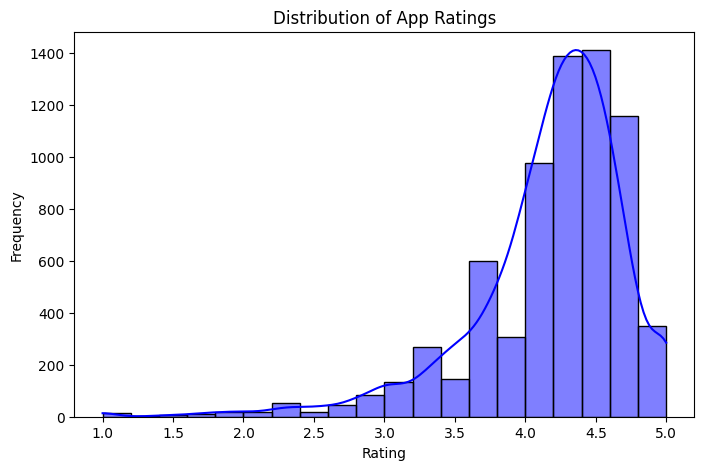

In [27]:
# Ratings distribution
plt.figure(figsize=(8, 5))
sns.histplot(apps_data_cleaned['Rating'], bins=20, kde=True, color='blue')
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

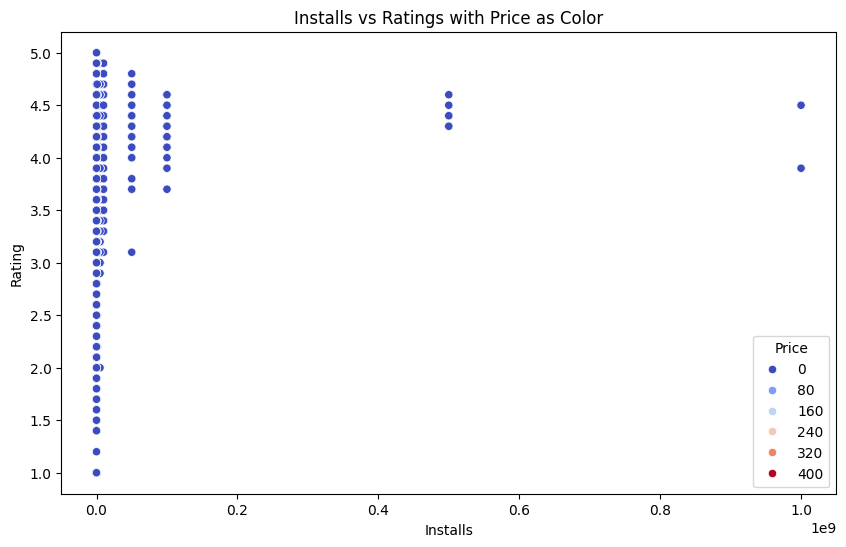

In [28]:
# Relationship between Installs and Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=apps_data_cleaned['Installs'], y=apps_data_cleaned['Rating'], hue=apps_data_cleaned['Price'], palette='coolwarm')
plt.title("Installs vs Ratings with Price as Color")
plt.xlabel("Installs")
plt.ylabel("Rating")
plt.show()

### 4. Sentiment Analysis

In [29]:
# Clean the reviews dataset
reviews_data_cleaned = reviews_data.dropna(subset=['Translated_Review', 'Sentiment'])  # Drop rows with missing reviews or sentiments

# Perform sentiment analysis on reviews using TextBlob
reviews_data_cleaned['Sentiment_Score'] = reviews_data_cleaned['Translated_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
reviews_data_cleaned['Sentiment_Category'] = reviews_data_cleaned['Sentiment_Score'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

/tmp/ipykernel_7850/4121058528.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7850/4121058528.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/tmp/ipykernel_7850/3425658624.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




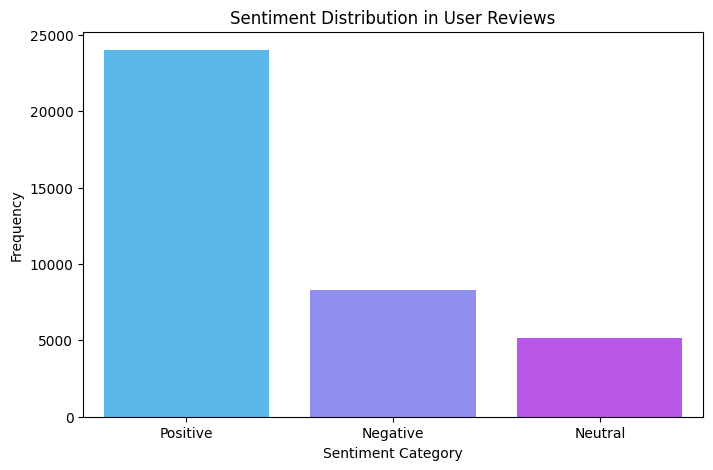

In [30]:
# Sentiment distribution
sentiment_counts = reviews_data_cleaned['Sentiment_Category'].value_counts()

# Visualization: Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='cool')
plt.title("Sentiment Distribution in User Reviews")
plt.xlabel("Sentiment Category")
plt.ylabel("Frequency")
plt.show()

### 5. Interactive Visualization

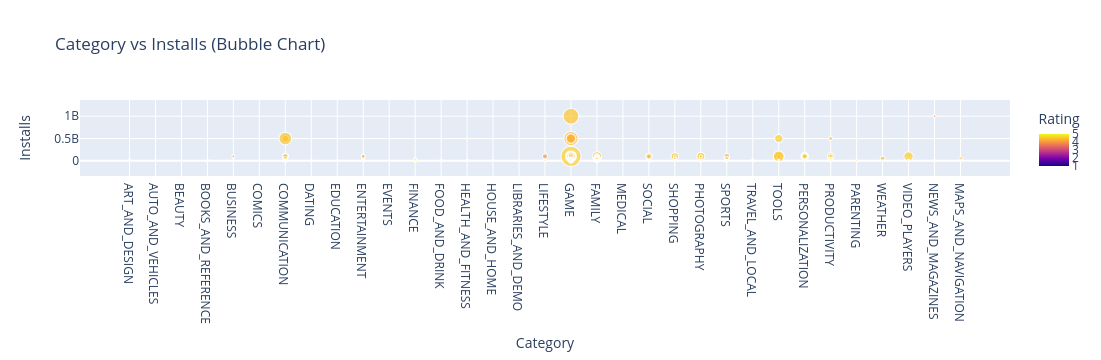

In [31]:
# Interactive bubble chart: Category vs Installs
fig = px.scatter(
    apps_data_cleaned,
    x='Category',
    y='Installs',
    size='Reviews',
    color='Rating',
    hover_name='App',
    title='Category vs Installs (Bubble Chart)'
)
fig.show()